In [41]:
from collections import Counter
import pandas as pd
import nltk

import requests
from bs4 import BeautifulSoup

def monograms(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    #stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]

    counts = Counter(words)
    monogramFreqTable = pd.DataFrame(counts.items(), columns = ['monograms', 'freq']).sort_values(['freq'], ascending=False)

    return monogramFreqTable

monograms("hello world. This is Tesla model 3. This is Tesla model S")

def get_article(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    article = soup.find("div", {"id": "article"}).findAll("p")
    return article    

#url = 'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210728.htm'
url = 'https://www.federalreserve.gov/monetarypolicy/fomcminutes20210127.htm'

article = get_article(url)
#print(article)

article_into_lst = []

for lines in article:
    lines = lines.text
    #print(lines)
    article_into_lst.append(lines)

#print(article_into_lst)

cleaned = ' '.join(article_into_lst)
#print(cleaned)

df_monograms = monograms(nike)
print(df_monograms.head(20))

     monograms  freq
177        and   102
0         nike    78
68           i    71
55     quarter    49
209    digital    44
283   consumer    44
156         we    42
200     strong    36
602       year    34
223   continue    33
101     growth    32
849  inventory    31
116   business    29
794      going    27
206     across    27
312     demand    27
648       grew    27
187      brand    25
184  consumers    25
250     supply    25


In [50]:
def bigrams(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]
    bigrams = nltk.collocations.BigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(words)
    bigram_freq = bigramFinder.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    
    return bigramFreqTable

df_bigram = bigrams(nike)

In [52]:
def trigrams(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]
    trigrams = nltk.collocations.TrigramAssocMeasures()
    trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(words)
    trigram_freq = trigramFinder.ngram_fd.items()
    trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
    
    return trigramFreqTable

df_trigram = trigrams(nike)

In [55]:
from matplotlib import pyplot as plt
import pandas as pd

def monograms_plot(datatable):
    df = datatable.head(20).reset_index(drop=True)
    #print(df)
    ax = df.plot.bar(x='monograms', y='freq', rot=0, figsize=(20,10))
    plt.xticks(rotation=45, ha='right')

def bigrams_plot(datatable):
    df = datatable.head(20).reset_index(drop=True)
    #print(df)
    ax = df.plot.bar(x='bigram', y='freq', rot=0, figsize=(20,10))
    plt.xticks(rotation=45, ha='right')

def trigrams_plot(datatable):
    df = datatable.head(20).reset_index(drop=True)
    #print(df)
    ax = df.plot.bar(x='trigram', y='freq', rot=0, figsize=(20,10))
    plt.xticks(rotation=45, ha='right')

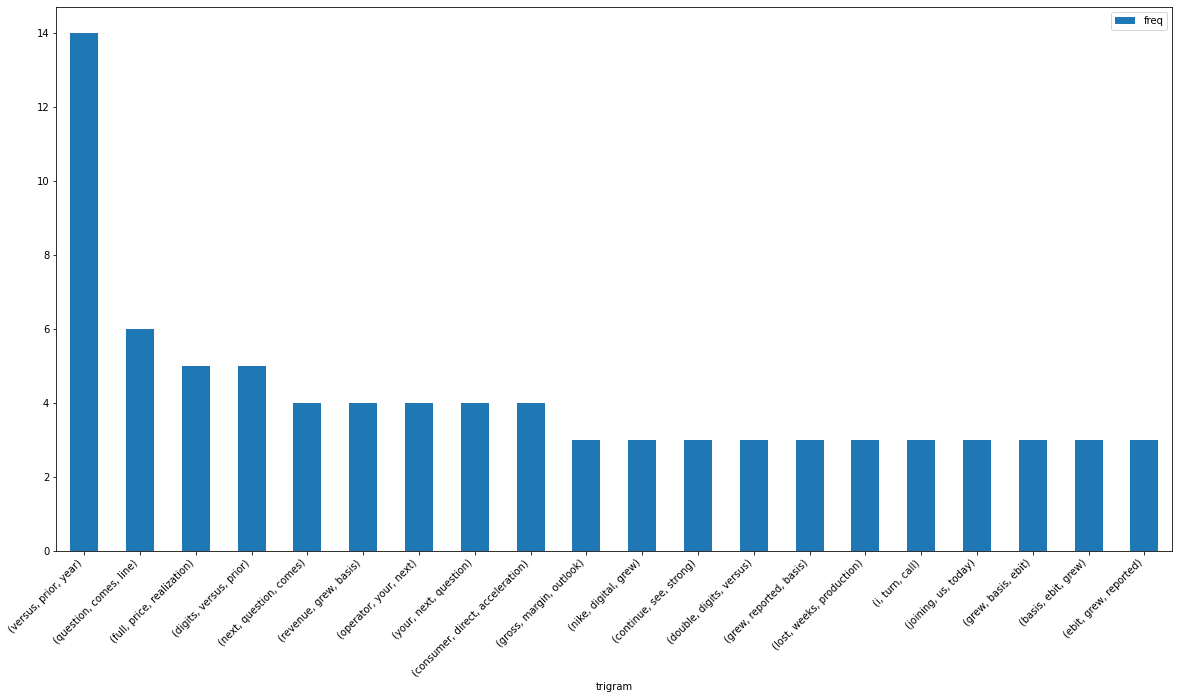

In [57]:
#monograms_plot(df_monograms)
#bigrams_plot(df_bigram)
trigrams_plot(df_trigram)

In [28]:
from textblob import TextBlob

zen = TextBlob("Beautiful is better than ugly. "
"Explicit is better than implicit. "
"Simple is better than complex.")

In [29]:
zen.words


WordList(['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex'])

In [30]:
zen.sentences

[Sentence("Beautiful is better than ugly."),
 Sentence("Explicit is better than implicit."),
 Sentence("Simple is better than complex.")]

In [31]:
for sentence in zen.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.2166666666666667, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.06666666666666667, subjectivity=0.41904761904761906)


In [38]:
nike = """

NIKE, Inc. (NYSE:NKE) Q1 2022 Earnings Conference Call September 23, 2021 5:00 PM ET

Company Participants

Paul Trussell - VP, IR and Strategic Finance

John Donahoe - President and CEO

Matt Friend - CFO

Conference Call Participants

Erinn Murphy - Piper Sandler

Matthew Boss - JPMorgan

Michael Binetti - Credit Suisse

Bob Drbul - Guggenheim Securities

Simeon Siegel - BMO Capital Markets

Kimberly Greenberger - Morgan Stanley

Operator

Good afternoon, everyone. Welcome to NIKE, Inc.’s Fiscal 2022 First Quarter Conference Call. For those who want to reference today’s press release, you will find it at http://investors.nike.com.

Leading today’s call is Paul Trussell, VP of Investor Relations and Strategic Finance.

Before I turn the call over to Ms. Trussell, let me remind you that the participants on this call will make forward-looking statements based on current expectations, and those statements are subject to certain risks and uncertainties that could cause actual results to differ materially. These risks and uncertainties are detailed in the reports filed with the SEC, including the annual report filed on Form 10-K. Some forward-looking statements may concern expectations of future revenue growth or gross margin.

In addition, participants may discuss non-GAAP financial measures, including references to constant dollar revenue. References to constant dollar revenue are intended to provide context as to the performance of the business eliminating foreign exchange fluctuations. Participants may also make references to other nonpublic financial and statistical information and non-GAAP financial measures. To the extent nonpublic financial and statistical information is discussed, presentations of comparable GAAP measures and quantitative reconciliations will be made available at NIKE’s website, http://investors.nike.com.

Now, I’d like to turn the call over to Paul Trussell.

Paul Trussell

Thank you, operator. Hello, everyone, and thank you for joining us today to discuss NIKE, Inc.’s fiscal 2022 first quarter results.

As the operator indicated, participants on today’s call may discuss non-GAAP financial measures. You will find the appropriate reconciliations in our press release, which was issued about an hour ago, or at our website, investors.nike.com.

Joining us on today’s call will be NIKE, Inc. President and CEO, John Donahoe; and our Chief Financial Officer, Matt Friend. Following their prepared remarks, we will take your questions. We would like to allow as many of you to ask questions as possible in our allotted time. So, we would appreciate you limiting your initial questions to one. Thank you for your cooperation on this.

I will now turn the call over to Nike, Inc. President and CEO, John Donahoe.

John Donahoe

Thanks, Paul, and hello to everyone on today’s call.

NIKE creates value through our relentless drive to serve the future of sport. And as we saw again in Q1, our strategy is working with business results that reflect our deep connection to consumers around the world. Thanks to our brand momentum, culture of innovation, commitment to purpose and proven operational playbook, we stay at the front of the pack.

Q1 was another strong quarter for NIKE, with revenue growth of 16%. And even as we saw physical retail traffic return across much of the portfolio, digital continued its momentum with 25% currency-neutral growth, led by North America at over 40%. Our digital success is evident of the product innovation, brand strength and scale that drives our meaningful relationships with consumers as we continue to show momentum against our biggest growth priorities.

As has been the case since the start of pandemic, I’m proud of the way our entire NIKE Inc. team has delivered through macro volatility. Over the past 18 months, we’ve demonstrated our ability to manage through turbulence to emerge even stronger and better positioned. And that’s what we’ll continue to do as we navigate through these current supply chain issues. We’ll focus on what we can control while leveraging the many levers at our disposal. You’ll hear Matt walk through our mitigation efforts in a few minutes.

Today, we’re in a stronger position relative to our competition than we were prior to the pandemic. Why? Because the changes happening in the market work in our favor. Consumers’ shift to digital that might have taken five years will now only take two. That plays to NIKE’s advantage. And our Consumer Direct Acceleration strategy is capitalizing on this marketplace transformation. We know that when we get to the other side of this, we’ll be in even stronger shape. We’ll be more agile, more direct and more digital.

So, we remain focused and confident in our long-term business outlook. Our competitive advantages, including our innovative product, brand strength fueled by compelling storytelling, our roster of the world’s best athletes and increasingly, our industry-leading digital experiences at retail will continue to create separation. As we drive strong, sustained consumer demand, our confidence remains undiminished.

We’ve just wrapped up an incredible summer of sport, highlighted, of course, by the Olympics and Paralympics. And moments like these are exciting for our company because sport energizes our roughly 75,000 employees around the world. You can just feel it. And it’s through that passion for sport that we continue to innovate and connect to the consumer.

And this summer in Tokyo, our leadership as the world’s most innovative sports brand was demonstrated once again. If NIKE were a country, we would have eclipsed the competition, capturing 226 medals, including 85 golds.

Here are a few examples of what excited us most this summer. We saw the emergence of Gen Z as a powerful next generation of athletes led by a pair of 13-year-old skateboarders who showed us the joy in the expansion of the definition of sport. We shined in key team sports, including football, where NIKE teams took home golds in both men’s and women’s and basketball, where NIKE and Jordan teams combined to take five of the six medals, including both golds. And we continued our great legacy in track and field with NIKE athletes winning more individual medals in track and field events than all other brands combined.

And at the same time, the European Championships brought incredible energy to football in Q1 with England making it to the final. Our brand anthem, The Land of New Footfall, brought a fresh approach to the sport, representing NIKE’s vision that in this game, everyone is welcome. The film saw more than 800 million impressions across all channels, as more than half of EMEA’s Gen Z population viewed it at least once.

And the summer sport also saw Giannis and the Milwaukee Bucks win the NBA title after an electrifying finals against Chris Paul, Devin Booker and the Phoenix Suns. Days later, we released Giannis’ latest signature shoe, the Zoom Freak 3, which is built to support the dominant physicality that defines his style of play. We continue to see strong response to the Zoom Freak, and we’re excited by what we’re seeing with our growing Giannis business.

And speaking of Devin Booker, Q1 was a great reminder of how we’re investing in the next generation of superstars as we continue to build our roster of athletes. Jordan Brand signed the NFL’s Dak Prescott in the quarter, joining emerging global icons in NIKE Inc.’s family, including U.S. Open Winner, Emma Raducanu and Manchester United’s Jadon Sancho.

At the end of the quarter, the summer sport gave way to back-to-school season. So far this fall, we’ve seen sell-through in our kids business up almost 30%, led by digital with growth of almost 70. As we focus on the kids opportunity, our new consumer construct through that, we are connecting with families more authentically than ever before. We’re creating kid-specific designs and leveraging new channels for us to connect with these consumers.

Take, for example, Playlist, which is a just-for-kids series on nike.com and YouTube. It’s filled with games, challenges and exclusive athlete content, all aligned to our mission of encouraging movement in play. Its latest season began a few months back with a new video starring LeBron James and some of his costars from their movie Space Jam: A New Legacy. Playlist has been a hit with kids and parents alike with viewership numbers well above our expectations.

And our kids business remains an important connection point for us, an organic incubator of the brand across multiple generations as we look long-term. We’re the largest kids athletic footwear brand in the world, but we know that there is still so much potential ahead.

And as I’ve said before, at NIKE, everything starts with innovation. Our culture of innovation is our most profound competitive advantage. And this week, I toured our new LeBron James Innovation Center here at our world headquarters with LeBron. At over 750,000 square feet, this new home for our innovation teams is five times the size of our previous lab and is continued proof of NIKE’s leadership in sports science. We expect this facility to act as an accelerant as it helps extend our advantage in innovation even further.

And looking at our innovation agenda, the two areas that I’d like to touch on today where our relentless pipeline of innovative product continues to create separation between us and our competition, apparel and sustainability.

First, let’s take a look at apparel. We’re seeing strong over-indexing growth of 16% in this key growth driver. And the investments we’re making in our new consumer construct are fueling higher apparel growth for women’s led by our yoga business. Our yoga collection today features multiple industry-leading innovations, including Dri-FIT and Infinalon. These innovations are resonating with consumers and have helped us nearly quadruple our yoga business over the past two years.

Another key apparel story for us in Q1 was our bras business. This quarter, we maintained our number 1 market share in sports bras in North America and introduced the NIKE Dri-FIT ADB Swoosh bra. Dri-FIT ADB combines the ultimate and cooling fabrics with highly engineered methods to make. It’s an innovation that’s connected with consumers as we scale this technology across our line.

And now, to take a look at sustainability, look at what we’ve done with Space Hippie. Space Hippie, as you may recall, is quite literally made from trash, and it was originally introduced at our 2020 Future Forum and debuted four separate sustainable material innovations for us, including Crater Foam and Space Waste Yarn. Now since then, we have strategically grown this franchise to global scale. And what’s more, we’ve also scaled these individual material innovations across our entire portfolio.

So today, one year after that initial launch, there are more than 43 styles using Space Hippie innovations across four sports, three brands and our full consumer construct. For instance, you can see it come to life in iconic franchises such as the Air Force 1 Crater; new performance innovation platforms like COSMIC Unity, and even in our hands-free accessibility line with styles like Glide FlyEase. By driving new dimensions across platforms, our work-to-scale Space Hippie innovations catalyze growth. Consumers are clearly responding to sustainability, as we’re seeing very strong full price sell-through for this family of product with vast opportunity to drive continued consumer and business value still ahead.

And this is just one example of how we lead with platforms and not just products. Our deliberate franchise and innovation management create scalable and sustainable impacts on our business, and I’m excited by the upcoming new innovation platforms we’ll be introducing soon.

Next, let’s discuss NIKE’s increasing digital advantage. We continue to lead the industry by creating a premium, consistent and seamless experience that deepens relationships between consumers and our brands. Our advantage comes to life at retail in both, digital as well as at the intersection of digital and physical. I’ll discuss both here.

Even as physical retail revenue approach pre-pandemic levels, our digital business this quarter grew double digits. This is the result of an unwavering focus on our strategy and the investments we’ve made against our end-to-end digital transformation. And so, we continue to expect digital to be our leading channel for growth in fiscal ‘22.

Now, one of the best gauges for success in our digital business is how strongly we’re connecting with members. Our digital growth is led by outsized member buying, which has seen a penetration increase of 14 points since last year. Our membership strategy is working as we increasingly use data and analytics to personalize member product offering and experiences. And we’re seeing this come to life as repeat buying members grew more than 70% in the quarter.

Now, part of our success stems from our constant focus on expanding what it means to be a NIKE member. We brought this to life in Q1 by introducing a new launch experience exclusive to the SNKRS App that revolutionizes how we serve consumers. The new experience debuted in one of the year’s most highly anticipated launches, the Off-White Dunk. For the launch last month, we rolled out our new elevated SNKRS exclusive access. This approach sends personalized purchase offers to members based on their engagement with SNKRS, past purchase attempts and other criteria, using data science to drive digital member targeting.

For example, 90% of the invitees for the Off-White Dunk went to members who had lost out on a prior Off-White collaboration over the past two years. The result, the Off-White Dunk end up in the hands of hundreds of thousands of our most-deserving members, creating what we call, exclusivity at scale. And this improved consumer experience has a positive impact on the entire business. We’ve seen that those who benefit from exclusive access on SNKRS spend more across NIKE, fueled by the energy of their win. So, our increasingly personalized approach to launch, along with benefits like member days and exclusive NIKE By You access, highlights how we continue to increase the value proposition of NIKE membership.

We’re also leveraging our digital advantage by investing in our brick-and-mortar fleet to create a compelling retail footprint that supercharges how we serve consumers across physical and digital. A couple of weeks ago, I was in Los Angeles and toured some of our great retail there. I got to see a wide variety of stores, including our NIKE Live door in Long Beach, a community door in East L.A. and more. And across each and every store, what jumped out to me was our team. Their love for their community and their passion for our product and bringing it to life for consumers was inspiring and just awesome to see. I also enjoyed visiting a few strategic partner doors, including DICK’s and Foot Locker. What’s clear across the marketplace, both owned and partnered, is how online to offline is becoming second nature. We know that higher levels of connectivity across physical and digital are driving better consumer experience and loyalty.

O2O services such as buy online, pick up in store and ship from store as well as the in-store shopping features of the NIKE App, drive our premium and seamless consumer experience. And we’re starting to extend these innovative experiences globally. In Q1, we brought our NIKE Rise, an immersive concept to Seoul. NIKE Seoul introduces new features to live -- or Rise, rather, including Inside Track, an interactive RFID-enabled digital footwear table where shoppers can compare details for any two shoes, simply by placing them on the table. Our digitally connected retail experiences are clearly resonating with consumers. This quarter, our in-line fleet grew over 70% in revenue, approaching pre-pandemic levels. We’re seeing over-index growth from members, not just at digital but also at physical retail, with member-buying penetration up double digits since last year.

And so, we’ll continue expanding these compelling experiences across our fleet in fiscal ‘22, driving that interplay between physical and digital retail. In the end, NIKE is doing what we always do, staying on the offense. The strength of our consumer demand around the world continues to give us confidence in our playbook and execution. I said it earlier and I’ll say it again, I am proud of our resilient and creative team across NIKE, Jordan and Converse, and the work we continue to deliver for consumers. Our confidence as we look long term has not changed one bit. We’ve already gotten stronger through this pandemic, and we’re going to emerge from it even stronger yet.

And with that, I’ll now turn the call over to Matt.

Matt Friend

Thank you, John, and hello to everyone on the call today.

NIKE’s acceleration to a more direct member-centric business model continues to fuel deep connections between consumers and our portfolio of brands. Drawing upon our culture of innovation, unmatched global scale and our industry-leading digital platform, we continue to serve the modern consumer as only NIKE can.

Our first quarter results proved again that our strategy is working. And NIKE’s Consumer Direct Acceleration is fueling the transformation of our long-term financial model. Our relentless focus on serving the consumer translated into revenue growth of 16% and EBIT growth of 22% versus the prior year.

The NIKE Brand remains distinctive and deeply connected in our key cities around the world. From New York to Paris, Shanghai to Tokyo, NIKE continues to be consumers’ number one cool and favorite brand with a position that has gained strength as we’ve navigated through the pandemic.

Consumer demand for NIKE, Jordan and Converse, remains incredibly high, and our first quarter financial results would have been even stronger, if not for supply chain congestion, resulting in lack of available supply. Despite these headwinds, retail sales still grew double digits versus the prior year, including a record-setting back-to-school season in North America.

SNKRS has increasingly become an indicator and barometer of brand heat now being operational at scale in 50 countries around the world. NIKE Digital is now 21% of total NIKE brand revenue, which is an increase of 2 points versus last year with strong double-digit growth versus the prior year, even with broad reopening of physical retail. Digital is increasingly becoming a part of everyone’s shopping journey, and we are well positioned to reach our vision of a 40% owned digital business by fiscal ‘25.

And coming back to marketplace health for a moment, we delivered strong growth in average selling price this quarter with continued improvement in full price realization. This performance reflects our intentional efforts to manage the health of our product franchises as demand surges, to move available inventory to serve demand in the right channels and to drive a more premium experience for consumers.

This quarter, we exceeded our 65% full price sales realization goal, which reflects the expectations that we put forward at our last Investor Day. As we accelerate our consumer-led digital transformation, we are developing and refining new capabilities that are transforming our operating model, quickly becoming a competitive advantage for NIKE. Central to these capabilities is scaling our digital-first supply chain to enable NIKE’s digital growth while optimizing service, cost, convenience and sustainability. We are evolving our distribution network and forward deploying inventory closer to the consumer, leveraging data and advanced analytics. These actions will improve service levels, reduce carbon impact and ultimately reduce cost to fulfill an order. Our regional service center outside of Los Angeles opened one year ago, and we’re excited with the opening of two more centers in Q1, one in the East Coast and one in Spain. Our investments in O2O services are putting our products in the path of more consumers and more efficiently optimizing our inventory. Today, we have at least two O2O services in each of our NIKE-owned stores in the U.S., and we are aggressively scaling these services across the globe.

Our Express Lane offense is also creating more and more agility across our portfolio, from creating locally relevant product on shorter lead times to leveraging a shared inventory pool across the marketplace, we are better conserving consumers with more operational flexibility, yielding higher profitability. This quarter, Express Lane grew roughly 20% versus the prior year and increased its share of overall business.

And last, the NIKE App continues to enable a convergence between physical and digital shopping journeys, eliminating friction for consumers. From member-driven personalization and localization to building an endless aisle through digital integration with our most important wholesale partners, Consumer Direct Acceleration is transforming NIKE’s operating model to move at the speed of the consumer.

Now, let me turn to the details of our first quarter financial results and operating segment performance.

NIKE, Inc. revenue grew 16% and 12% on a currency-neutral basis, with growth across all marketplace channels. NIKE Digital grew 25% and NIKE-owned stores grew 24%. Wholesale grew 5% in the quarter, negatively impacted by lower available inventory supply due to worsening transit times. Gross margin increased 170 basis points versus the prior year, driven primarily by higher NIKE Direct margins and partially offset by increased ocean freight surcharges.

SG&A grew 20% versus the prior year. This was due to higher wage-related expenses, higher levels of brand activity connected to return to sport and strategic technology investments. Our effective tax rate for the quarter was 11% compared to 11.5% for the same period last year. This was due to increased benefits from stock-based compensation and discrete items, offset by a shift in our earnings mix. First quarter diluted earnings per share was $1.16, up 22% versus the prior year.

Now, let’s move to our operating segments. In North America, Q1 revenue grew 15% and EBIT grew 10%. Demand for NIKE remained incredibly strong for the fifth consecutive season, energized this fifth consecutive season, energized this quarter by back-to-school and the return-to-sport. Retail sales for our performance business grew strong double digits during the fall season, led by running, fitness and basketball, powered by excitement from the Olympics, the new WNBA season and the NBA finals.

NIKE Direct grew more than 45%, with NIKE Digital now representing 26% share of business. Digital continued its momentum and grew more than 40%, increasing market share by outperforming industry trends with strong growth in traffic and repeat buying member activity. The return to physical retail accelerated NIKE-owned store growth of over 50% as we serve members with elevated experiences. NIKE-owned inventory increased 12% versus the prior year. This was driven by highly elevated in-transit inventory levels as transit times in North America deteriorated during the last quarter, now almost twice as long as pre-pandemic levels. This impacted product availability across the marketplace and our ability to serve strong levels of consumer demand, particularly in the wholesale channels. Closeout inventory was down double digits versus the prior year.

In EMEA, Q1 revenue grew 8% on a currency-neutral basis and EBIT grew 26% on a reported basis. This region was energized by the Euros this summer, where NIKE players scored more goals than all other brands combined, and more than half of those goals were with our material boots. We saw a strong consumer response to both the material boot and replica jerseys during the tournament.

NIKE Direct grew 10% on a currency-neutral basis, led by our NIKE-owned stores. Following a full reopening, we saw traffic increase by double digits versus the prior year with better-than-expected conversion rates. In EMEA, while NIKE Digital grew 2% in the quarter, demand for full-price products grew nearly 30% as we compare to higher liquidation levels in the prior year. NIKE-owned inventory declined 14% on a reported basis with closeout inventory down double digits. Transit times to EMEA have also deteriorated over the past 90 days, causing higher levels of in-transit inventory and negatively impacting product availability to serve strong consumer demand.

In Greater China, Q1 revenue grew 1% on a currency-neutral basis. EBIT grew 2% on a reported basis as the team delivered in line with our own recovery expectations. Retail sales were impacted in late July and August due to regional closures and lower levels of foot traffic due to COVID containment. Prior to late July, physical traffic had been approaching prior year levels. In July, we engaged with consumers through the launch of our Joy of Sports, local marketing campaign. This campaign generated over 1 billion local views, demonstrating strong brand connection with Chinese consumers.

NIKE Direct declined 3% on a currency-neutral basis, partially impacted by retail closures. NIKE Digital declined 6% as we compare to higher liquidation in the prior year, partially offset by double-digit improvement in full price sales mix. We experienced a strong 6/18 consumer moment where we grew nearly 10% versus the prior year and remained the number one sports brand on Tmall. Demand in our SNKRS App grew more than 130% for the quarter.

Our experienced local team continues to navigate through marketplace dynamics. We finished the quarter with healthy marketplace weeks of supply, and inventory normalization is on plan.

Now moving to APLA. First quarter revenue grew 31% on a currency-neutral basis and EBIT grew 72% on a reported basis. Revenue growth was led by SOCO, Japan, Mexico and Korea, with more muted growth in Pacific and Southeast Asia and India due to COVID restrictions and government-mandated store closures.

NIKE Digital grew more than 60% on a currency-neutral basis, highlighted by the expansion of our NIKE App. In June, the app went live in Mexico and 6 additional countries across Southeast Asia, generating 3 million local downloads during the quarter.

Earlier on the call, John spoke about the new NIKE Rise retail experience in Seoul. To mark the opening of the store, our Express Lane, SNKRS and NIKE Rise teams created the NIKE Seoul Dunk. This collaboration drove more than half of day one sales and highlight how digital and physical experiences are converging in our own stores, leveraging local insights and a more agile supply model.

Now, I will turn to our financial outlook. Consumer demand for NIKE remains at an all-time high, and we are confident that our deep consumer connections and brand momentum will continue. However, we are not immune to the global supply chain headwinds that are challenging the manufacture and movement of product around the world.

Previously, I had shared that we for transit times to remain elevated for the balance of fiscal ‘22. Unfortunately, the situation deteriorated even further in the first quarter, with North America and EMEA seeing increases in transit times due primarily to port and rail congestion and labor shortages. Additionally, several of our factory partners in Vietnam and Indonesia were required to abruptly cease operations in the first quarter. As of today, Indonesia is now fully operational. But in Vietnam, nearly all footwear factories remain closed by government mandate.

Our experience with COVID-related factory closures suggest that reopening and ramping back to full production scale will take time. Therefore, we’re revising our short-term financial outlook to incorporate the following factors: 10 weeks of production already lost in Vietnam since mid-July; factory reopening to occur in phases beginning in October with a ramp to full production over several months; and elevated transit times, consistent with where we are now operating today.

We now expect fiscal ‘22 revenue to grow mid-single digits versus the prior year versus our prior guidance of low double-digit growth, due solely to the supply chain impacts that I just described. Specifically for Q2, we expect revenue growth to be flat to down low single digits versus the prior year as factory closures have impacted production and delivery times for the holiday and spring seasons. Lost weeks of production, combined with longer transit times, will lead to short-term inventory shortages in the marketplace for the next few quarters.

We expect all geographies to be impacted by these factors. However, those geographies in Asia with less in-transit inventory at the end of the first quarter will experience a disproportionate impact beginning in Q2. For the balance of fiscal ‘22, we expect strong marketplace demand to exceed available supply. We are optimistic inventory supply availability will improve heading into fiscal ‘23, against the backdrop of a very strong brand and healthy pull market across all geographies.

Turning to the rest of the P&L, we still expect gross margin to expand 125 basis points versus the prior year, at the low end of our prior guidance, reflecting stronger-than-expected full price realization, the ongoing shift to our more profitable NIKE Direct business and price increases in the second half. This more than offsets roughly 100 basis points of additional transportation, logistics and air freight costs to move inventory in this dynamic environment. We also expect a lower foreign exchange benefit, now estimated to be a tailwind of roughly 60 basis points. And for the second quarter, we expect gross margin to expand at a rate lower than the full year due to higher planned airfreight investment for the holiday season.

We expect SG&A to grow mid to high teens. We intend to maintain our position as the number one cool and favorite brand and to celebrate the return to sport as we inspire and engage consumers around the world. We will also maintain pace on our multiyear investment plans in order to transform our business for the future, as I’ve outlined in prior quarters. NIKE’s financial strength is a competitive advantage, and it is in moments like these where our competitive strengths and strong balance sheet affords us the ability to remain focused on what’s required to win and serve consumers for the long term.

In closing, our vision for NIKE’s long-term future remains unchanged. NIKE is a growth company with unlimited potential. Despite new short-term operational dynamics, our Consumer Direct Acceleration offense is driving our business forward and transforming our financial model toward the long-term fiscal ‘25 financial outlook I shared last quarter. This quarter’s impressive results are additional proof that our strategy is right, not only for the moment we find ourselves in, but also for the opportunity to serve the future of athletes and sport like only NIKE can. I wouldn’t trade our position with anyone, and there is no better team to navigate through volatility and lead long-term transformational change.

With that, let’s open up the call for questions.

Question-and-Answer Session

Operator

Your first question comes from the line of Erinn Murphy with Piper Sandler.

Erinn Murphy

Great. Thanks. Good afternoon. And I really appreciate the update on what you’re seeing real-time in the supply chain. I guess, my question relatedly is, are there any -- if you look to the fall and back half -- or holiday season, are there any key footwear franchises that are being more impacted than others? And then, when you zoom back and think about the longer-term, what type of investments do you plan to continue to make within the supply chain to continue to improve your agility? Thanks so much.

Matt Friend

Well, Erinn, thanks for the question. There are several aspects to the current supply chain challenges that are probably not intuitive, just based on my prepared remarks. And so, let me take a couple of minutes to try to break it down further.

As I said earlier, consumer demand has never been higher, and we expect strong demand to continue for quarters to come. Over the last 90 days, two things have happened in the industry that we didn’t anticipate: first, already long transit times worsened; and second, local governments mandated shutdowns in Vietnam and Indonesia. Keep in mind that there are global complexities and differences in transit times and sourcing mix across our geographies. So, I’m going to use North America as an example to just go a little deeper on what I’m talking about.

Prior to the pandemic, it would have taken approximately 40 days to move product from Asia to North America. Transit times have been increasing due to container shortages, port congestion, rail congestion and labor shortages, impacting the entire industry. And during Q1, these lead times worsened further to now sit at 80 days, roughly two times normal.

So, here’s where the geo-specific piece comes in. So, as we finished Q1 with higher levels of in-transit inventory, that means that we had full price inventory that was unavailable to use to serve current consumer demand in this quarter. We would have had an even stronger top line result if we had more product available to serve that consumer demand. And so, these elevated transit times that we’re seeing, we’ve been talking about them now for several quarters, and they worsened this quarter, continue to have an impact on our business.

And then in addition to that, there’s Vietnam. And it’s important to think about these two impacts together. As of today, 80% of our footwear factories located in the south and nearly half of our apparel factories in Vietnam are currently closed. So, through this week, that means we’ve already lost 10 weeks of production, and that gap will continue until factories are able to reopen and produce product at normal capacity. So, this has created a gap to the flow of inventory, originally ordered for delivery beginning in mid-October. And our experience shows us, based on navigating through this pandemic over the last 18 months that it’s going to take several months to ramp back to full production.

Now, on a positive note, a few factories have just had their reopening plans approved, like this week. And so, we’re optimistic about a phase reopening and ramp of production beginning in October. And as I said in the call -- earlier in the call, Indonesia is already operational, and they’re ramping back up to capacity.

So, North America is coming into Q2 with elevated and transit inventory which means North America will have higher quantities of fall season product that it can sell in the second quarter. But holiday and spring production has been delayed. And if you combine that with longer lead times, the impact of the lost production is going to have a greater impact in North America in Q3.

Conversely, Greater China, which has lower levels of in-transit inventory and shorter transit times because it’s closer to the factories, is going to experience the impact of the lost production earlier in Q2.

Our teams are leveraging their experience in our operational playbook and taking actions to try to mitigate these impacts. And they’re doing things like maximizing our footwear production capacity in other countries, shifting apparel production out of Vietnam to other countries like Indonesia and China and others where viable, strategically leveraging airfreight. And then, we’re continuing to employ a seasonless approach to product to serve incredibly strong consumer demand, given our success that we’ve had selling at full price, even if the product reaches the market later than we expected.

So, while the environment is dynamic, these supply chain issues we believe are temporary. And from what we can see today, we’re optimistic that available inventory supply will be improved as we head into fiscal year ‘23.

John Donahoe

And Erinn, to the second part of your question on -- in that context investment, we’re doing what strong companies do during periods of time like this. We’re going to continue to invest in innovation and product creation, in brand and storytelling and support of sport being back and our strong sports marketing portfolio and our digital transformation. So, that’s continuing. And then, we’ll continue with strong presence around driving demand and brand even in the face of a supply-constrained market, and as Matt mentioned, accelerate air transportation and other things in our supply chain that allow us to take -- manage every lever we can in this supply chain-constrained environment. So, we’re going to -- again, our mantra going into this next phase is the same mantra we had going into the first phase of the pandemic. Let’s make sure we emerge stronger coming out of it than we have even today going in.

Operator

Your next question comes from the line of Matthew Boss with JPMorgan.

Matthew Boss

Great. Thanks. So, John, maybe could you speak to the overall health of the athletic industry? How best to think about overall TAM for NIKE as we exit the pandemic? Can you leverage size, scale and innovation to accelerate market share?

And then, Matt, real quick, just on the revised gross margin outlook for this year, aside from the supply chain impact, I guess, my question is, could you speak to maybe some of the underlying drivers? It sounds like full price selling digital margin is on track. Meaning aside from the supply chain dynamics, does anything really change? Meaning do you see this as fully transitory, any change to the multiyear gross margin outlook?

John Donahoe

Well, Matthew, on the first part of your question, the healthy athletic market is in our remarks. Sport is back. And that is just such an energizing and important thing for NIKE. And we saw that this summer. I won’t go back through it, whether it’s the Olympics, basketball, global football, incredible U.S. Open Tennis; it goes college football, U.S. football back. I mean, it’s -- so I would say traditional sports is what I’ll call it, is strong and back. And that’s also happening now in high schools and grade schools as kids come back to school.

Second thing we’re seeing is the expansion of the definition of sport, whether that’s in the Olympics with sports like skate being included for the first time. Some of the most exciting moments in the Olympics was around skate, right, and as that young generation, Gen Z generation really dominating remarkably in a very compelling way. But also coming out of pandemic, the definition of sport, I think, is getting to every athlete -- asterisk in different ways, just the concept of movements and health, and the fact that sport can happen in your living room as well as going to the gym or the yoga studio or the basketball court. And so, part of the tailwind we’re seeing is sport is becoming part of everyone’s everyday life. And that’s a powerful tailwind for us.

And then, athleisure, that’s blurring the line between the sport part of your life and the rest of your life, is also what we view as a tailwind. So, we’re doubling down on traditional sport, on capitalizing on these -- the new emerging definition of sport. You saw that in skate in the Olympics. You see that in some of our brand campaigns being really close to where that Gen Z consumer is. And we think that bodes well for our future.

Matt Friend

And I’ll just hit the gross margin quickly, Matt. We believe that this quarter was an excellent proof point of the success that we’re seeing in driving our consumer-led digital transformation. We’re seeing meaningful movement forward in both, NIKE Direct mix of business and also NIKE Digital mix of business, as I mentioned. And that’s what fueled our gross margin expansion in the first quarter, high levels of full price realization, greater mix of NIKE Direct and NIKE Digital business and lower markdowns as we leverage the capabilities that we have to serve consumer demand, how and where they want it.

As we look longer term, we’re absolutely continuing to look towards that high-40s gross margin outlook that we provided last quarter. And in the short term, we’re going to navigate through these transitory impacts. But, when you’ve got a strong brand and you’ve got a healthy pull market, what we’re seeing is strong full price margins offsetting some of these transient costs that we’re going to experience as we move product around the world.

Operator

Your next question comes from the line of Michael Binetti with Credit Suisse.

Michael Binetti

Maybe, John, could you click into the China trends a little bit more in the quarter? I guess, John -- on that. Last quarter, you spoke to some of the trends within the quarter after the impact in April to help us give an understanding of the path back to what was headed back to normal at the time. Any kind of dimensions this quarter? You mentioned there are some COVID lockdowns in a few markets that weighed on the total China trend. Maybe where we’re at in 2Q to date and what you see is the right pace to think about getting back to normal in that market?

And then, on North America, to the extent that you do need to make decisions in the allocations of the inventory going forward, I know you had a good amount in transit that can feed into 2Q, but how should we think about how you’re thinking about allocation between the DTC channel and wholesale as we roll forward from here? Is it similar dynamics to what we saw in the first quarter, or any change in that trajectory?

John Donahoe

Matt, why don’t I take the first part of Mike’s question, you take the second for North American. On China, Michael, I’ll just reiterate what I said last quarter, is we take a long-term view in China, we’ll invest for the long term, and we’re confident in the long-term opportunity. And coincidentally, this is the 40th -- this month is the 40th anniversary of NIKE’s participation in China.

And, we saw Q1 results that were roughly in line with our expectations. And as Matt said, supply constraints will impact our second quarter performance. But, we are continuing to do what frankly Phil has done from the beginning in China, which he’s done over the last 40 years and we’ve done and we will continue to do over the next 40, which is deliver innovative product that connects with local consumers, strong consumer connections to our brand, partly reinforced by the 7,000 monobrand stores across the country. We’re blessed to have a really strong local team, and I am so proud of that team, how they’re navigating through. As we’ve said many times before, they have led us in the sort of pandemic playbook and they continue to be very responsive on the ground there. And then, we always have been and will continue to be, very respectful and responsible corporate citizens, promoting sport and the wellbeing through activity and promoting sustainability and other important societal themes. And so, we’ll continue to stay on that playbook and invest with consistency and longevity during this period of time.

Matt Friend

And just transitioning to North America, we’ve continued to deliver strong growth in that marketplace. I mentioned five consecutive quarters of -- or seasons, I should say, of incredibly strong demand. As we think about the marketplace, our approach is really no different than we’ve been talking about for a couple of years now. We start through the eyes of the consumer. Where is the consumer shopping? How is the consumer engaging with our brand across the marketplace? And we’re going to continue to focus on prioritizing our product availability for those locations where the consumer is shopping, and that will continue to be within NIKE’s own channels and our most strategic wholesale partners. And that’s what we’re going to continue to do to serve that demand. The marketplace, as I said, is going to be lean. We’re going to have lean inventory across the marketplace. But, NIKE and our partners will continue to try to create the best consumer experience that we can throughout the remainder of that -- of this fiscal year.

Operator

Your next question comes from the line of Bob Drbul with Guggenheim Securities.

Bob Drbul

Just two questions. The first one is on the spending levels. With the updated outlook on the revenue with the disruption of the supply chain, can you just help us understand how you’re thinking about spending against the lower levels of revenue, whether it’s demand creation or the investment technologies? And I have a follow-up.

Matt Friend

Sure. Thanks, Bob. The year-over-year comparisons, as we’ve talked about for a while here, are not really intuitive. And a couple of quarters ago, I talked about, as we were starting to see the strength in consumer connections and the acceleration of our business, that we were going to begin accelerating investment to drive our digital transformation. And in particular, where we were investing was against technology, our digital -- creating a digital-first supply chain and the marketplace. And we created a multiyear investment plan against our outlook to drive that growth.

And when we finished the first quarter, we finished our first quarter spending at about 29% of revenue. And as we think about the transitory nature of these impacts, we believe this is a moment where NIKE’s financial strength is a real competitive advantage. And so, we believe that these short-term dynamics will pass, but we’re more convinced and committed to what we believe the capabilities we need to operate a consumer direct business at scale as we execute the strategy. And so, that’s where our focus and attention is going to be. We’re going to keep our teams focused on creating those capabilities and which we’re seeing translate into strong growth and profitability. And that also includes the investments that we’re making from a brand perspective. Strong brands get stronger in this environment. And having that deep consumer connection, especially when it’s rooted to sport and the return of sport is absolutely what we need to be doing in order to continue to stay in a position of strength.

Bob Drbul

Great. And if I could just sneak one more in. I think, the Drake NOCTA line dropped today, or -- I just wondered if you might give us some learnings on what you think about how that product is going and the opportunity that you have for something like that?

John Donahoe

Bob, I am so glad you asked. I had a SNKRS win this morning on the NOCTA line, the vest. I’m excited. It’s a great collection. Any time you went on SNKRS, it’s a jolt. I was in the middle of my workout in one of our gyms here on campus. I stopped the workout at 7 a.m. to see if I won, and I won. So, I’m pumped up about that, as our -- as we said earlier, in all seriousness, millions and millions of SNKRS users. What a great experience. And obviously, that line is just another example of how NIKE is unparalleled in our ability to create real innovative, stylish, heat and connection with the consumer.

Operator

Your next question comes from the line of Simeon Siegel with BMO Capital Markets.

Simeon Siegel

Just when thinking about your price elasticity of demand, so recognizing the unit pressures you’re talking about with inventory. Can you just talk about maybe the opportunity or order of magnitude for potential pricing you see? And then, Matt, any way just to parse out the change in wholesale performance this quarter between the undifferentiated partners and then the strategic partners that you’re continuing to support? Thanks.

Matt Friend

Yes. So, on the pricing question, we -- I mentioned in my prepared remarks that we’ve taken some pricing actions in the second half. And what I would say, Simeon, is that we evaluate price value of our products on a season-by-season basis. And we consider a number of different factors that we incorporate to make a decision about what to do. But, what I will tell you is that we take a long -- we have a long-standing relationship with our consumer. And so, we take a long-term view to these types of decisions. And so, the price increases that we’ve implemented in the second half are in the low single-digit range. And we feel it’s appropriate given the marketplace we’re operating in and those other factors that I referenced, considering we’ve got rising input costs and other factors that are impacting our business. But, I think it’s really important not to drive past the fact that we continue to see strong growth in ASPs across the whole marketplace, driven by higher full price realization as we’ve been talking about for several quarters and lower markdowns, and leveraging the capabilities of identifying our inventory, knowing where we want to put it, putting it in the path of the consumer, optimizing it between ourselves and our physical locations, our digital locations and increasingly providing that endless access to some of our wholesale, to some of our most strategic wholesale partners. All of these things are contributing to a higher level of full price realization across the marketplace. And so, we do believe that this is a base from where we want to operate as opposed to a moment in time. And that’s driving profitability for NIKE at a moment that -- where there’s lots of disruption.

I think in terms of your second question in terms of undifferentiated or differentiated, what I would tell you is that we continue to see strong growth in our differentiated partners. And our differentiated partners because of the fact that they are creating a better consumer experience and driving more demand, their weeks of inventory on hand is about half where they would like for it to be right now because of the strong demand that they’re driving. And to take it a step further, over the last three years, we’ve actually exited about 50% of our undifferentiated accounts while we’ve been able to deliver strong double-digit growth. And so, we believe that we will continue down this strategy. And as John alluded to in his prepared remarks, we believe that the supply-related reductions will likely trigger an even greater acceleration in the transformation of the marketplace towards NIKE and our most important wholesale partners.

Operator

Your last question comes from the line of Kimberly Greenberger with Morgan Stanley.

Kimberly Greenberger

Great. Thank you so much. And really, really great color on the call today. Thank you. Matt, I wanted to just talk through the resumption in production and when you see inventory levels normalizing, assuming that production resumes through that October, November time frame that you laid out. As you sort of think about your lead times, the low inventory levels, when do you think, in calendar year 2022, you’re going to feel really comfortable about having gotten caught up on the inventory that is holding back revenue growth here over the next few quarters? Thanks so much.

Matt Friend

Sure. Well, Kimberly, our optimism stems from the fact that our factories are starting to have reopening plans approved. And that has happened this week. And so, we’re optimistic that we’re going to start to see production begin in October. Our experience from the COVID-related closures in China earlier in the pandemic and then in Indonesia earlier this quarter tells us that it will take time for those factories to ramp back up to full capacity.

We’ve lost 10 weeks of production since mid-July. And so, what we’re really focused on is, are our factory partners getting back to full capacity so that we can serve demand that we see in the marketplace. When we combine the lost production and the re-ramping plus the extended lead times, we feel optimistic that we’re going to see inventory supply improving as we exit this fiscal year and move into fiscal year ‘23. And our experience would tell us that while this situation is going to be dynamic and it’s not going to be linear, that’s what we’re planning towards at this point in time.

John Donahoe

And I might just build on that, Kimberly, to say, both Matt and I wish we had a crystal ball, but we don’t. And one of the things that I think we are demonstrating through this very dynamic phase is regardless of what the future holds, we’re capitalizing on it, right? We’re doing what great sports teams do, which is making -- confronting the reality, making adjustments, showing agility and executing in a way where we emerge stronger. And so, we had demand shocks last year with the closing of retail in the phase 1 of pandemic. And now we’ve got some supply shocks with phase 2 of the pandemic this year. We will navigate through those just as we did last year. I think we’re stronger today than we were 18 months ago and we’ll be stronger 18 months from now than we are today. And in the process, we’re building that capability where we’re leveraging our strengths and we’re leveraging the leadership position.

And I just want to maybe conclude this call, Paul, by once again, just expressing my sincere thanks and appreciation for the 75,000 NIKE teammates around the world, who day in and day out are adjusting to the circumstances on the field, are demonstrating teamwork and resilience and creativity to serve consumers and continuing to innovate. And that’s what we’ll continue to do regardless of what the future deals us.

Paul Trussell

Thank you, Kimberly, for the question, and thanks to all for joining us today. We look forward to speaking with you next quarter. Take care and stay safe.

Operator

Ladies and gentlemen, we thank you for your participation in today’s conference call. This concludes today’s conference call. You may now disconnect.

"""

In [40]:
type(nike)

str

In [ ]:
nike_2 = 
"""
NIKE, Inc. (NYSE:NKE) Q4 2021 Earnings Conference Call June 24, 2021 5:00 PM ET

Company Participants

Andy Muir - Vice President, Investor Relations

John Donahoe - President and Chief Executive Officer

Matt Friend - Chief Financial Officer

Conference Call Participants

Bob Drbul - Guggenheim Securities

Kimberly Greenberger - Morgan Stanley

Matthew Boss - JPMorgan

Erinn Murphy - Piper Sandler

Omar Saad - Evercore

Adrienne Yih - Barclays

Operator

Good afternoon, everyone. Welcome to NIKE, Inc.’s Fiscal 2021 Fourth Quarter Conference Call. For those who want to reference today’s press release, you will find it at http://investors.nike.com. Leading today’s call is Andy Muir, VP, Investor Relations.

Before I turn the call over to Ms. Muir, let me remind you that participants on this call will make forward-looking statements based on current expectations and those statements are subject to certain risks and uncertainties that could cause actual results to differ materially. These risks and uncertainties are detailed in the reports filed with the SEC, including the annual report filed on Form 10-K. Some forward-looking statements may concern expectations of future revenue growth or gross margin.

In addition, participants may discuss non-GAAP financial measures, including references to constant dollar revenue. References to constant dollar revenue are intended to provide context as to the performance of the business eliminating foreign exchange fluctuations. Participants may also make reference to other non-public financial and statistical information and non-GAAP financial measures. To the extent non-public financial and statistical information is discussed, presentations of comparable GAAP measures and quantitative reconciliations will be made available at NIKE’s website, http://investors.nike.com.

Now, I would like to turn the call over to Andy Muir, VP, Investor Relations.

Andy Muir

Thank you, operator. Hello, everyone and thank you for joining us today to discuss NIKE, Inc.’s fiscal 2021 fourth quarter results. As the operator indicated, participants on today’s call may discuss non-GAAP financial measures. You will find the appropriate reconciliations in our press release, which was issued about an hour ago or at our website, investors.nike.com.

Joining us on today’s call will be NIKE Inc.’s President and CEO, John Donahoe; and our Chief Financial Officer, Matt Friend. Following their prepared remarks, we will take your questions. We would like to allow as many of you to ask questions if possible in our allotted time. So we would appreciate you limiting your initial questions to one. In the event, you have additional questions that are not covered by others, please feel free to re-queue and we will do our best to come back to you Thanks for your cooperation on this.

I will now turn the call over to NIKE, Inc.’s President and CEO, John Donahoe.

John Donahoe

Thanks Andy, and hello to everyone on today’s call. Looking at Q4 and the full fiscal year we just concluded, our strong business results proved yet again NIKE’s unique competitive advantage. Our relentless focus on our objectives is clear and our strategy is working. We are excited by the momentum we continue to see.

In Q4, we saw growth of over 95%, which translates to 19% growth for the fiscal year. This full-year growth was led by our own digital business, which has now more than doubled versus fiscal ‘19 prior to the pandemic. I’ve said before that these are times when strong brands can get stronger. And each quarter, this reality becomes even more clear. Today, we are better positioned to drive sustainable long-term growth than we were before the pandemic. Our team has proven their ability to be unrelenting and executing against the macro complexities while also building the future. We saw broad-based growth this quarter led by North America at over 140%. Greater China’s currency-neutral growth of 9% was impacted amidst marketplace dynamics with improving trends as we exited the quarter. One of NIKE’s strengths is our diverse global portfolio. And through the power of that portfolio, we once again over delivered on our expectations for the quarter.

As we look ahead to fiscal ‘22, the opportunity ahead of us is significant. We remain very confident in our long-term strategy and our growth outlook. The structural tailwinds we’ve discussed before, including the return to sport and permanent shifts in consumer behavior toward digital and health and wellness continue to create energy for us. And we remain focused on our largest growth drivers, including our women’s business, apparel, Jordan, and international. NIKE sets the pace through a continuous flow of new innovation, the world’s greatest roster of athletes and compelling experiences for consumers that create lifelong relationships with our brand. Our strengths and proven playbook give us the confidence to move even faster to invest at even a more accelerated pace against the opportunities we see ahead.

As the world’s largest athletic footwear and apparel brand, we take seriously our leadership position to promote sport participation and an active lifestyle through inspiration and innovation. Our goal isn’t merely to take market share. Our goal is also to grow the entire market. NIKE’s growth has been and will continue to be the result of three areas I will walk through today: connecting with consumers through compelling brand experiences across Nike, Jordan, and Converse; driving product innovation against our greatest growth opportunities; and expanding our digital advantage.

First, let’s discuss how we serve consumers. As sport continues to return, NIKE leads with our unique, rich heritage and our deep roster of global superstars and up-and-comers who connect us with consumers everywhere. Euro 2020 started two weeks ago with Cristiano Ronaldo becoming the leading scorer in Euro’s history. England, France, Portugal, and the Netherlands are among the teams with great momentum heading into the tournament’s next stage, and we’re proud that more goals have been scored thus far wearing NIKE boots than all other brands combined. On the club side, Chelsea won the Champions League on the men’s side and Barcelona was the top team on the women’s side. In the U.S., the WNBA season is underway with the Seattle Storm in first place led by Sue Bird and Jewell Loyd. And in the NBA, a captivating playoffs has showcased our unmatched rosters of the game’s greatest players across NIKE and Jordan, including KD, LeBron, Luka, Jokic, and several who are still in the hunt like Giannis, Chris Paul, Devin Booker, and Paul George.

And earlier this week, I was in Eugene for the U.S. track and field trials and got to see incredible performances from Sha’Carri Richardson, Michael Norman, Ryan Crouser, and many others. We remain excited for the power of sport on full display during the Olympics and Paralympics in Tokyo this summer and in Beijing next year. This authentic connection with consumers is also fueled by our belief in redefining how we open access to sports for consumers everywhere. Our recent campaign, Play New, launched in May, kicking off our largest ever invitation to Gen Z and marking the ignition point of a month-long rally around finding joy and movement in play. We focus Play New on TikTok and Snapchat to show Gen Z that, in their words, sport is a change accelerator. And their response has been remarkable. The app’s augmented reality lenses featuring yoga, dance, and surf led to more than 600 million Gen Z impressions in just the first two weeks.

Earlier, I mentioned our goal to grow the market. Well, by inspiring people to try something for the first time, we vastly expand the community of athletes. And we continue to bring the emotion and power of our brand to life through our digital ecosystem, which is led by the SNKRS App. In Q4, SNKRS grew over 90% in demand and saw nearly 80% growth in monthly active users. We’re now offering this growing audience of high-value members in almost daily flow of compelling content and product launches. For Air Max Day in March, six different livestream events gave SNKRS Live its highest viewership ever. So, whether it’s through SNKRS Live or user-generated style inspiration, SNKRS is the perfect intersection of content, community, and commerce.

Moving to my second point, our relentless pipeline of innovative product continues to create separation between us and our competition. Our product is fueled by sharp consumer insight supported by marketing data and analytics as we continue to invest in our digital transformation. And through our new operating model, we are bringing more precision to the art of product creation as we blend the heart and science of innovation. For Q4, let me touch on two great examples of how we are investing in our top growth opportunities, our women’s business and Jordan Brand. We are investing and focused across the entire value chain to unlock the vast opportunity we see for women’s. For the full year, our women’s business drove outsized growth of 22% versus the prior year. And despite the tremendous momentum we’re seeing in women’s, we know that there’s even greater growth ahead as we move even faster with our new organization structure and invest far more resources in serving women end to end.

For instance, in the marketplace, we continue to provide more compelling retail environment through our NIKE Live format. In fact, this past year, we opened nine new NIKE Live doors, which offer personalized experiences and services for female consumers. Our investments also mean a larger, sharper focus on women’s-only insights, services, and product innovation, and we’re already seeing this work come to life. Consumer insight from our female consumer drove the new Pegasus 38, which kept the best cushioning innovations from this popular franchise while improving and tailoring comfort and fit that she wants. The Peg 38 has sold extremely well, and we continue to be energized by the potential we see in footwear for her.

For the WNBA’s 25th season this year, we created the most comprehensive player, team and fan apparel collection in league history. The new WNBA uniforms were completely reengineered to deliver the exact fit, movement and comfort players said that they want from their jersey and sport. The players love them and consumers have agreed with sales growth well above our expectations and that heightened demand extended to the larger product assortment, with the WNBA’s 25th anniversary tee selling out in 1 day. This is just one example of how we drive energy for women’s sport across the marketplace as we remain excited by this enormous opportunity looking forward.

Next, let’s discuss Jordan Brand, whose momentum continues to be driven by its unique blend of heritage and innovation as well as its deep connections to consumers and communities around the globe. In fiscal ‘21, Jordan Brand grew 31%, propelling the business to nearly $5 billion. This growth was driven by continued energy for Jordan’s most coveted icons, including the AJ1 and AJ11 as well as new product dimensions. For example, Jordan’s women’s business nearly tripled in Q4, fueled by compelling product, such as the Flight Essentials apparel collection. We are also increasingly are excited about our delivery of exclusive access for women through collabs like Aleali May’s AJ1, which drove over 40% female buyers, more than 10 points higher than average AJ1 buyer profile. In Q4, Jordan also launched Zion Williamson’s first signature shoe, the Zion 1, as well as the apparel collection. As the first Gen Z signature shoe in Jordan Brand’s history, Zion offers both transcendent athletic possibility as well as a deep personal connection with fans. The strong sell-through of Zion’s signature shoe collection demonstrates the continued love for Jordan Brands’ roster of athletes all over the world.

Quickly looking to the summer in Tokyo, in the next few weeks, we will be officially launching more of our Olympic product, including our USA women’s basketball and football uniforms, our 4 Skateboarding Federation Kits and a new Medal Stand shoe featuring our hands-free FlyEase technology. We are excited by the strong reaction we’ve seen for our Olympic product thus far. And we are also thrilled to see our innovation continue to separate us. In running, this includes our Vaporfly Next% 2 for distance runners as well as our best-in-class track spikes. As you have probably heard, our spikes are creating dominant performances at the U.S. track and field trials not just for NIKE athletes but competitor athletes as well. From performance to the Medal Stand to sustainability, we’re excited for the world stage this summer in Tokyo to put a global spotlight on our advantage and innovation.

One final observation on innovation, I recently got the chance to see the long-term product plans that our teams are developing against our new consumer construct of women’s, men’s, kids and Jordan with sharpness against sport performance and sport lifestyle, and I could not be more excited. It’s safe to say that we’re more confident than ever in our product pipeline as our focus on the consumer of the future drives our relentless innovation engine. And as we start welcoming employees back to work in our new state-of-the-art design and innovation centers, I know that our innovation pace will only quicken as we reinvent what’s possible. My third and final point is increasing our digital advantage. As I said earlier, our owned digital business has more than doubled over the past 2 years to over $9 billion. And at the center of our digital ecosystem is our suite of apps, which in Q4 reflected over 40% of our owned digital business. This is the result of deeper consumer connections fueled by compelling product and content.

A key differentiator for us is membership. It has proven to be a compelling driver of repeat engagement and buying across digital and physical retail. In Q4, we continued to see growth in member demand outpace total digital growth, hitting a new record of $3 billion. This member demand growth was underscored by strong results across the consumer funnel, including member engagement, average order value and buying frequency. In this fiscal year, we met the goals we set at our last Investor Day around membership a full year early and now have more than 300 million NIKE members. More importantly, buying member growth is outpacing new member growth, signaling progress on a deeper member-led commerce funnel.

We are always looking to elevate our unique member proposition whether that means expanding the number of member-exclusive products or creating new and meaningful retail experiences through Member Days, our NIKE-only retail moments. And this engaging membership experience fuels a virtuous cycle, feeding insight to product creation, inventory optimization and more. Knowing and serving our members drives greater competitive separation. Today, we are the clear leaders in our industry, and we continue to see digital as our leading channel for growth in fiscal ‘22. The combination of owned and partner digital revenue is now nearly 35% of our total business, more than 3 years ahead of our prior plan. And we see no sign of this shift slowing. In fact, we believe we will achieve 50% digital mix of business across owned and partnered in fiscal ‘25.

As part of our overall One Nike Marketplace, we are also actively engaged with our strategic wholesale partners who share our vision. Today, we’re working closely with large strategic partners like DICK’s Sporting Goods, Foot Locker and JD Sports as well as compelling local neighborhood partners who are authentic to sport performance and lifestyle. Together, we are driving change to create a new, more connected and seamless experience for consumers around the world, which is exactly what consumers want. It’s a shift that speaks to our belief that the strong gets stronger. We’re supercharging how we serve consumers with convenience, innovation, content and services. This is how we stay ahead of the pack and expand our lead.

Finally, as we end our fiscal year, I want to thank our global NIKE teammates. We’ve all been through a lot this past year. And at NIKE, that’s included store closures, supply chain challenges, a digital transformation, a new accelerated strategy and more. And throughout it all, our team has delivered for our consumers and communities. So I just want to take a moment as I close to recognize and personally thank our 75,000 NIKE teammates. You’ve demonstrated creativity, teamwork and resilience, and you are the reason NIKE leads. I’ve said it before, and I’ll say it again, the people of NIKE are our greatest competitive advantage.

With that, I’ll turn the call over to Matt.

Matt Friend

Thank you, John, and hello to everyone on the call today. Before I begin my prepared remarks, I too want to take a moment to thank our incredible team. They have delivered extraordinary results over the past year. I also want to take a moment and recognize Andy Muir. This will be her last earnings call as Vice President of Investor Relations after recently becoming CFO of our Jordan Brand. Thank you, Andy, for your leadership and specifically for your support in my transition to CFO last year. I wish you the best of luck in your new role. I know you’ll do great. And backfilling Andy in this role is Paul Trussell, who many of you already know. Paul joins us from Deutsche Bank, and we’re excited to welcome him to the NIKE team.

Now I’d like to begin today’s call with a baseline on where we are in our recovery. Just as we anticipated, NIKE is emerging from the pandemic stronger and better positioned to serve the consumer. And the reason for this is clear, NIKE’s Consumer Direct Acceleration is fueling a deeper consumer connection with our brands and driving business results, all while highlighting greater strategic and financial opportunity ahead. Over the past 15 months, we have navigated through this challenging environment with outstanding execution of our operational playbook. We have faced every challenge head-on, focused on what we could control, all while keeping the consumer at the center. These actions have helped set a strong foundation for sustainable growth and profitability, with business performance now exceeding pre-pandemic levels.

In the fourth quarter, we delivered over $12 billion of reported revenue, our largest quarter ever. Our NIKE Direct business is now approaching 40% of total NIKE Brand revenue. NIKE Digital represents 21% of total NIKE Brand revenue, a milestone we’ve reached several years ahead of our prior plan. And finally, our fiscal ‘21 EBIT margin reached 15.5%, reflecting more than 300 basis points of expansion when compared to fiscal ‘19. These metrics now become the new baseline from which we expect to grow. As we recover from the global pandemic, it is clear that our Consumer Direct Acceleration strategy is transforming NIKE’s financial model. So later on the call, I will share our financial outlook through fiscal year ‘25, reflecting a more direct, member-centric business model. However, first, I would like to provide additional detail on our extraordinary fourth quarter results and operating segment performance.

NIKE, Inc.’s revenue increased 96% and 88% on a currency-neutral basis. This was driven by strong wholesale shipments and NIKE owned store performance as we anniversary pandemic-related store closures. Even as physical retail reopened, we continued to see strong growth in NIKE Digital of 37% versus the prior year. Gross margin increased 850 basis points versus the prior year driven by favorable NIKE Direct margins and the anniversary of higher costs, including actions taken to manage supply and demand in the face of the COVID-19 pandemic.

SG&A grew 17% versus the prior year due to higher levels of brand activity connected to return of sport, digital marketing to drive digital demand, technology investments to support our digital transformation and higher wage-related expenses. Our effective tax rate for the quarter was 18.6% compared to 1.7% for the same period last year due to decreased benefits from discrete items in the prior year and a shift in earnings mix, primarily related to pandemic recovery. Fourth quarter diluted earnings per share was $0.93 and full year diluted earnings per share was $3.56, up 123% versus the prior year.

Now let’s move to our operating segments. In North America, Q4 revenue grew 141%. This also marked the first-ever $5 billion quarter for North America driven by notable improvement in full price sell-through as the marketplace reopened and sport activity returned. Demand for NIKE remained incredibly strong. And as we expected, delayed revenue from the global supply chain disruption in the third quarter was recaptured during the fourth quarter. NIKE Direct grew over 120% as NIKE owned stores returned to positive sales growth versus pre-pandemic levels. More importantly, NIKE Digital grew over 50%, while physical traffic continued to improve across the marketplace. NIKE Direct performance was propelled by our members across both digital and physical retail. Member demand nearly doubled versus the prior year, and the number of buying members grew roughly 80%.

Across the total marketplace, we continue to see strong retail sales growth and consumer demand for our brands exceeding marketplace supply with marketplace inventory down double digits versus the prior year. NIKE owned inventory declined 7% with double-digit declines in closeout inventory. In-transit full price inventory remains elevated as we continue to experience longer end-to-end lead times for supply. We expect supply chain delays and higher logistics costs to persist throughout much of fiscal ‘22.

In EMEA, Q4 revenue grew 107% on a currency-neutral basis with strong growth across the region, including the UK and Ireland, France, Germany and Italy. NIKE Direct grew 57% despite government restrictions requiring nearly half of our NIKE owned stores to remain closed for the first 2 months of the quarter. In May, as restrictions eased, we saw a strong consumer response with incredible pent-up demand, and this momentum has continued into June. NIKE Digital grew nearly 30% versus the prior year. Through our member days, we saw strong engagement with member demand outpacing total NIKE Direct revenue growth with all-time highs for female active members during Air Max week. In the fourth quarter, we also expanded the NIKE mobile app to more than 10 new countries across the region.

During our last earnings call, I shared our expectation that inventory in EMEA would normalize in the first quarter of fiscal ‘22. We have exceeded that goal due to stronger-than-anticipated consumer demand, ending fiscal ‘21 in a healthy and normalized inventory position. In Greater China, Q4 revenue grew 9% on a currency-neutral basis. For the full year, Greater China delivered its 7th consecutive year of double-digit growth, demonstrating our consistent brand strength and commitment to serving the consumer. NIKE Direct grew 2% in Q4, with strong growth in NIKE owned stores, partially offset by declines in NIKE Digital. As John mentioned earlier, Q4 business results were impacted by marketplace dynamics. After a strong March, our business in Greater China was impacted in April, and we adjusted our operations by suspending marketing activities and product launches. We then began to see a recovery trend, improving to a single-digit decline in May and sequentially improving into June, with month-to-date retail sales trends approaching prior year levels. And for the 6/18 consumer moment, our flagship store on Tmall ranked number one, driving the highest demand across the sports industry.

Building on our 40-year history in Greater China, we continue to invest in serving consumers with the best products Nike has to offer in locally relevant ways. We also continue to invest in the creation of a premium, seamless consumer digital experience and supply chain capabilities. And we plan to open a new digital technology center in Shenzhen to better serve Chinese consumers. We have an experienced local team in Greater China who helped create our operational playbook at the beginning of the pandemic. They have proactively managed marketplace supply and demand in order to navigate through these dynamics, and we expect inventory to be normalized by the end of Q2.

Now moving to APLA, Q4 revenue grew 76% on a currency-neutral basis, with growth across all territories led by Japan, SOCO and Mexico. And Korea grew double digits this quarter on top of the 8% growth they delivered in the fourth quarter of last year. NIKE Digital grew more than 50%, enabled and amplified by our membership offense. This was highlighted by member days, which drove all-time highs for member demand. This momentum also extended to our marketplace partners in APLA as they return to growth versus pre-pandemic levels and achieved their highest level of full price realization since the beginning of the pandemic. During Golden Week in Japan, the Express Lane assortment was heavily influenced by member insights and delivered a sell-through rate that was 2x the rate of the rest of NIKE Digital in Japan, showcasing the power of blending art and science that John referenced earlier. APLA was the last geography to launch our Express Lane offense, and we see significant opportunity to leverage these capabilities to drive deeper, authentic consumer connections across the region.

Now as we look ahead to fiscal ‘22 and beyond, I want to provide a new financial outlook through fiscal ‘25. As we emerge from the pandemic, accelerate our consumer direct strategy and transform the operating model of the company. First of all, NIKE is a growth company, and we expect to sustain strong revenue growth going forward. This is based on the significant market opportunity that we see for our brands across the portfolio as well as our accelerated shift to a more direct member-centric business model. As a result, we expect revenue growth to inflect upwards to a range of high single-digit to low double-digit growth on average with outsized marketplace opportunities in women’s, apparel, Jordan, digital and international.

Growth will be led by NIKE Direct and our strategic marketplace partners. Earlier, I mentioned NIKE Direct is approaching 40% of our brand business today, and we expect it to represent approximately 60% of the business in fiscal ‘25, led by growth in digital. And as John said earlier, we expect owned and partnered digital to achieve 50% business mix in fiscal ‘25 with NIKE owned digital to represent 40% of the business. We will continue reshaping our wholesale business portfolio, which includes divesting from undifferentiated retail while investing in our strategic wholesale partners for healthy growth. Overall, we expect wholesale revenue to remain roughly flat versus fiscal ‘21. We will support partners who continue to authenticate our brand as well as those who have the scale to create a consistent, premium, digitally connected experience for consumers across the marketplace.

Our longer term revenue outlook reflects higher growth expectations across several operating segments. We will continue to leverage the power of our diverse global portfolio. And we expect, on average, North America to grow mid-single to high single digits, EMEA to grow high single digits and APLA to grow low double digits. And with respect to Greater China, while marketplace dynamics still exist, we are optimistic that we can continue to grow low to mid-teens over the long-term. We remain committed to investing in the local consumer experience and inspiring the next generation of athletes in China. We will continue to serve consumers with NIKE’s performance innovation and sports style product franchises, while also increasing local customization of style and fit for consumers. For several quarters now, I’ve highlighted that the strategic and financial benefit of shifting to a higher mix of business through NIKE Direct led by digital and leveraging enhanced data and analytics capabilities to optimize inventory, drive higher full price realization and lower digital fulfillment costs.

We now see gross margin rate reaching the high 40s by fiscal ‘25. We will continue to reallocate resources and invest to enable our digital transformation and fuel the long-term growth and profitability opportunities that we see. Having said that, we expect to invest in SG&A at a rate that drives leverage versus pre-pandemic levels, which averaged roughly 32% to 33% of revenue. As a result of all of these, we see our EBIT margin reaching high teens by fiscal ‘25 with earnings per share growth of mid- to high teens on average over this period. As we drive towards a more direct business model, we remain committed to create long-term value for our shareholders through serving consumers and sustaining our disciplined financial management. We expect to deliver strong growth in free cash flow, maintain annual capital expenditures at roughly 3% of revenue, drive returns on invested capital above prior guidance of the low 30% range and deliver consistent returns to shareholders through dividends and share repurchases.

Now that I’ve discussed our updated financial outlook through fiscal ‘25, I will provide guidance for fiscal ‘22. As I’ve already said, we entered the fiscal year strong, confident that our deep consumer connections and brand momentum will continue despite being in a dynamic operating environment. Our confidence is rooted in the fact that consumers in key cities rate NIKE as their favorite brand, that retail sales continue to grow strongly on lean marketplace inventory and our organization is aligned against our new consumer construct, which will help us accelerate even faster against our largest growth opportunities.

In fiscal ‘22, we expect revenue to grow low double digits and surpass $50 billion, reflecting strong consumer demand across our operating segments as we lead with digital, scale NIKE owned physical retail concepts and grow with our strategic partners. It’s important to note, as we normalize our post-pandemic business and continue to reshape the marketplace we do not expect quarter-by-quarter growth to be linear. Therefore, we expect first half growth to be slightly higher than second half growth. We expect gross margin to expand 125 to 150 basis points, reflecting our continued shift to a more profitable NIKE Direct business and sustained strong full price realization, partially offset by higher product costs, supply chain investments and the annualization of certain one-time benefits in fiscal ‘21.

Foreign exchange is estimated to be a tailwind of roughly 70 basis points. We expect SG&A growth to slightly outpace revenue growth as we normalize spend with return to sport and more consistent store operating schedules as well as investments focused against our largest growth opportunities, which I have shared previously. However, we do expect leverage relative to pre-pandemic rates of investment. And last, we expect the fiscal ‘22 effective tax rate to be mid-teens.

As we begin our next fiscal year, NIKE continues to navigate through a dynamic and rapidly changing environment. At the same time, we are on the offense and accelerating our strategy to serve more consumers personally and at scale. Our unmatched innovation continues to enable world-class athletes to reach new levels of performance as sport returns to the main stage. Our product pipeline is strong, and we are even more deeply connected to consumers than before the pandemic. We are building upon the strong foundation we set in fiscal ‘21 and accelerating our pace for the next leg of the race. We have a clear vision for our brand’s long-term future, and we are focused on what it will take to get there.

With that, we will now open up the call for questions.

Question-and-Answer Session

Operator

Your first question comes from the line of Bob Drbul with Guggenheim Securities.

Bob Drbul

Yes. Good afternoon, and Paul Trussell, congratulations. And Andy, best of luck, and thanks for all the information today. I guess the first question that I have, can you spend a little more time on China? Exactly – I mean you gave us a lot of detail around how it’s progressing. I guess I would be curious just to hear, when you think about the inventories and you think about how you are planning the next few quarters from a flow perspective, if you could give us a little more color just how you would plan China on the revenues, I guess either quarterly or just for the year based on the trends? Thanks.

Matt Friend

Sure, Bob. And hello, and thanks for the question. As we think about the dynamics that we are managing through in China right now, we are optimistic as we continue to see improvement sequentially each month. As we think about fiscal ‘22 and the guidance we provided, we are planning for continued recovery throughout fiscal year ‘22, but we don’t expect it to be linear. And what I would say is, longer term, we are optimistic given our history of operating in China and our connections and relationship with consumers that over the long term we will be able to deliver low-to-mid teens growth.

Bob Drbul

Great. And I just have a question sort of – I guess it will be a North American question as a follow-up. But with LeBron out and KD out, you still have Giannis, and I just wondered if you think this is his year and you think he can bring the trophy home.

John Donahoe

Well, we certainly hope so. If not LeBron, Devin Booker and if not Devin Booker, Paul George or many of the other NIKE athletes, and what’s been one of the – just one of the great NBA Playoffs, I know we have all enjoyed the game. It’s so great the sport is back. It’s so great that the stands are full. So, the excitement that we feel with the entire NBA and frankly, all the great sport going on right now is palpable.

Bob Drbul

Great. Thank you very much.

John Donahoe

Thanks Bob.

Operator

Your next question comes from the line of Kimberly Greenberger with Morgan Stanley.

Kimberly Greenberger

Great. Thanks so much, and thanks so much for the outlook here through 2025. There is a noticeable sort of inflection in the business that you are calling for here, and I can just hear the enthusiasm. So, I wanted to just ask about what are the sort of key underpinnings that’s giving you confidence in the acceleration in the growth rate. And where do you see basically the support for this level of acceleration? What’s driving that?

Matt Friend

Sure, Kimberly. Well, as we have talked about throughout this year, we have continued to see the way that we have gotten closer to the consumer creating deeper connections, and as we look at how our brand is positioned around the world, we continue to be very optimistic with what we see. That’s translated into very strong retail sales growth throughout the year. And in many circumstances, we have seen demand outstripping supply. As we think about the future, especially as we exit ‘21 and we move forward to ‘22, there are definitely specific things that give us optimism and confidence. John just mentioned one of them, which is the return to sport, and we are already starting to see an acceleration in our sport performance business. We are excited about the connections that we are driving from a digital perspective, especially as physical retail reopens. We believe that is a sticky shift that will continue, and that’s embedded in our guidance for ‘22 and also the longer-term outlook that I provided for you. And that shift of – a 20-point mix shift in direct is definitely an inflection from a revenue – it creates an inflection from a revenue perspective. And then lastly, I would say that we continue to talk about the significant opportunities that we see more broadly in the marketplace. And while we have had momentum, and we continue to see those dimensions of business outstrip the growth of the rest of the business, the opportunity is still significant relative to our share in those specific areas. And so, what I am referring to there is our women’s business and the opportunity we see in front of us, the apparel business and the opportunities that we see there, and then the momentum that we have with the Jordan Brand, in particular, and the opportunities that we see for that brand both in North America, but in international markets as well.

Kimberly Greenberger

Very clear and so exciting. Thank you.

Operator

Your next question comes from the line of Matthew Boss with JPMorgan.

Matthew Boss

Great. Thanks. Congrats on a really nice quarter and a really great hire. So John, maybe on the digital transformation, could you help outline what you think most differentiates your digital strategy to continue to build the marketplace leadership? And Matt, maybe with that, could you just help walk through the profitability of the digital channel as it relates to the algorithm that you outlined and maybe which line items it’s most impacting?

John Donahoe

Well, sure, Matthew. The first thing, never look a wonderful tailwind in the eye or look away from one. So, we have got a – there is a fundamental shift in consumer behavior toward digital. And that’s been happening, but the pandemic has simply accelerated that. And that provides the opportunity for us to have a direct connection with consumers, which is increasingly important in a digital world where consumers, while they are going more digital are focusing on fewer and fewer apps. And we are going to be one of the very few apps that have a direct connection with consumers, and that’s unlocking great growth. That’s unlocking growth in our ability to serve them with more personalized shopping experiences, with recommendations across our vast product portfolio with services and other ways to engage them like NIKE Run Club, NIKE Training Club. So, we think we are one of the very few in our industry that will be able to establish that direct connection with consumers both around commerce, but also engage them on a weekly, monthly, quarterly basis. And then that produces great consumer insight, and that consumer insight has a bit of a virtuous cycle. The more you have of it, the more you can use it. You can use that consumer insight as I said earlier on, personalizing a recommendation or anticipating a need on replenishing a product when you know they are going to need it. It also drives efficiency in our operations, right. We talk about building a digital supply chain. What that’s all about is having the intelligence to know, having the right product in the right place at the right time, so that we can deliver that product at a low-cost, convenient, and speedy and a climate-friendly way. And last, but not least, that insight – consumer insight helps fuel product creation. I mean the more we know about our consumers, the more we can build the kind of compelling product that they want and need. And so, we feel like – as Matt said, there is a virtuous cycle by embracing our digital transformation as aggressive as we are. We think we can create competitive separation. And so – and we still – we think it’s going to be a journey that has continuous improvement and continuous ROI and benefits along the way.

Matt Friend

Yes. And I would just add that the NIKE App or our app ecosystem continues to have a significant impact, and we are continuing to invest in the consumer experience in order to take advantage of the consumers’ interest and appetite in engaging with our brand in that way. The app actually represents about 40% of our digital business at this point in time, and we are planning to launch the NIKE App in 10 more countries in fiscal year ‘22. As I think about the financial model, Matt as you asked, I sort of answered in my question to Kimberly, which is this shift to digital and that direct sale to the consumer is definitely causing us confidence to inflect our revenue outlook upwards as a first point. The second point I would say is that as we have continued to see over the past several quarters and really, if you sort of look through the pandemic, it’s really over the last 3 years as we have been seeing more and more business being done through direct and digital. We have been talking about how that shift in mix has enabled us to drive and increase our gross margin expansion versus historical levels of gross margin expansion. And so that’s what’s embedded in that high-40s guidance outlook. It’s continuing to shift to more direct business. And then within that direct business, we continue to see opportunities like I referenced, leveraging data and analytical capabilities, so digital transformation-type capabilities to know where to place our inventory, how to fulfill demand closer to the consumer, whether it’s through our stores or through our regional service centers, how to think about pricing based on the way inventory is flowing and then continued demand and supply management. And then I guess the last thing I would say is that the way that we framed our SG&A guidance is that we feel confident that as we look at the transformation that’s taking place in our business over the next 4 years that at that level of SG&A investment, which is better than where we were in the pandemic, we can fund the investments that we need to fuel this growth and sustain the opportunity that we have in front of us.

Matthew Boss

Congrats on the momentum and the new multiyear model.

Matt Friend

Thanks.

Operator

Your next question comes from the line of Erinn Murphy with Piper Sandler.

Erinn Murphy

Great. Thanks. Good afternoon. I guess a follow-up question for the team on the China marketplace. Bigger picture, just with the accelerating growth of late and some of the national athletic brands, can you just share how you are thinking about NIKE’s market share potential as you work through the 2025 plan within China specifically? And then secondly, if I could just ask on the women’s business, it hit over $8.5 billion in this fiscal year. Could you just share kind of what your expectation is in the plan by 2025 and just the role you see some of the smaller footprint stores and the suite of apps you have developed playing in the progression there? Thank you so much.

John Donahoe

Sure. Matt, why don’t I take the first part and then maybe you take the second part of Erinn’s question?

Matt Friend

Sure.

John Donahoe

So Erinn, bottom line, we are confident about what we are seeing in China as we drive long-term growth. And we have a long-term view about China. And we have always taken a long-term view. We have been in China for over 40 years. Phil invested significant time and energy in China in the early days. And today, we are the largest sport brand there, and we are a brand of China and for China. And the biggest asset we have in China is the consumer equity. Consumers feel a strong, deep connection to the NIKE, Jordan and Converse brands in China. And it’s real. I saw that in my first week here, can’t wait to get back there. And it’s strong. And that’s brought to life on streets all over China through the over 7,000 mono-brand stores we have in China. So, we have a strong consumer franchise in China, and they feel very connected to our brand. And so we are going to continue to invest. We will continue our long-term investment in China whether it’s through the Express Lane, which allows us to have local product insights, so design and deliver with speed and agility or we are localizing our tech stack. Matt mentioned we are opening a new digital technology center in Shenzhen. And we are going to invest for the long-term, and we are encouraged by the momentum and we have confidence in the future. It’s interesting. We have been the #1 sports brand in Tmall for a decade, and we are still #1 today once we open back up on it. Over the last month, we have added 1 million new members on Tmall through the 6/18 shopping holiday. And so we are focusing on what we can control. We are confident of our momentum and our position. And we will – as Matt outlined, we feel confident about our long-term growth in China.

Matt Friend

Yes. And I will just jump in, Erinn, on women’s. We – this might sound interesting, but we are the largest women’s athletic brand in the world today at $8.5 billion. And we are very bullish on the opportunity for women’s. We have been talking about it for several years. And it starts by what John said on the call, which is that the main purpose of our realigning our organizational structure was to try to amplify the investment at multiples of where we were previously investing against our women’s business. And those investments are end-to-end, from specific innovation and the way we invest in innovation to the way we are investing in product creation, to the way that we are now investing in the marketplace through our NIKE Live concepts. And our NIKE Live stores are almost 50% women’s sales, which are more than 15 points ahead of our other stores in terms of women’s proportion of the revenue. And so it’s definitely embedded and underlying our revenue outlook. And I would tell you that we expect to see women’s outpace other elements of our business as we invest and drive against the long-term opportunity.

Erinn Murphy

Great. That’s super helpful, and congratulations to all.

Operator

Our next question comes from the line of Omar Saad with Evercore.

Omar Saad

Thanks for taking my question. Great quarter. Congrats to everyone. High-teens operating margin target really is a huge breakout from historical trend and a lot of the long-term guidance that you guys have given over the years. Clearly, technology and NIKE’s digital excellence is really the root of this kind of transformation we have all been talking about. I would love to hear – I saw that Converse continues to improve. I would love to hear you talk about how you are using that digital advantage and applying it at Converse. Is Converse starting to generate some of the benefits of these incredible technologies that you have developed under the Jordan and NIKE halo? I would love to hear more on those lines. Thanks.

John Donahoe

Well, the short answer, Omar, is yes. I mean we are blessed with this wonderful portfolio of brands; Nike, Jordan and Converse. And they are additive. That’s what’s so striking is, while there is some consumer overlap, the role that each plays is additive in the eyes of the consumer. And so Scott and the Converse team are doing a great job of connecting with a distinct consumer and expanding – it’s much like the Jordan playbook – expanding beyond just historical icons like the Chuck and bringing new design, new dimension to the product there. In fact, it’s the fastest-growing part of their portfolio. We just had an operating review a couple of weeks ago and was really striking to see how they are extending that brand into both performance product into new ways to leverage that Converse brand and the product line as well as getting into apparel and going global. And so their digital capabilities are growing to have their own, as you know, in addition to being able to get to them on the NIKE website, and get to them on their own website. And their digital business is growing at very comparable levels as NIKEs are and Jordans are around the world. And so we see a lot of upside in the Converse opportunity and the Converse brand.

Matt Friend

Yes. And we think that digital is going to play a really important role for Converse as they reshape the composition of their own marketplace. And so that’s what’s been driving growth for the last couple of quarters or for the last eight quarters, and it’s continued to help us as they create that direct connection with consumers as well.

Omar Saad

Got it. Thanks.

Andy Muir

Operator we have time for one more question.

Operator

Thank you. Your last question comes from the line of Adrienne Yih with Barclays.

Adrienne Yih

Good afternoon. Thank you very much. Congratulations on the quarter and congratulations to Andy and Paul. My question is, Matt, on the $50 billion or greater than $50 billion for the out-year for fiscal ‘22, what is the expectation for China in that number? And I guess more specifically, in what quarter can we – or half of the year perhaps – can we expect to see China return to perhaps pre-pandemic trend rate? And which channel is going to be the most predictive: wholesale or direct/digital? Thank you very much.

Matt Friend

Well, Adrienne, the – our FY ‘22 guidance reflects the optimism and the momentum that we are seeing across our full portfolio, brands and different geographies. As I mentioned on China, we are optimistic and encouraged based on the sequential improvements that we are seeing, so our business was impacted in April. It was down single digits in May, but improving, and approaching prior year levels in these first 3 weeks of June. Obviously, the 6/18 consumer moment gives us optimism as we continue this recovery. And we are planning for recovery throughout fiscal year ‘22, but we don’t expect it to be linear.

Adrienne Yih

Okay. Thank you very much.

Andy Muir

Thank you, Adrienne. Thanks, everyone, for joining us today. We look forward to speaking to you next quarter. Take care and stay safe.

Operator

Ladies and gentlemen, this concludes today’s conference call. We thank you for your participation. You may now disconnect.
"""